<a href="https://colab.research.google.com/github/Temerius/ML/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import time
import matplotlib.animation as animation

In [ ]:
# hyper parameters
k = 5
size = 1000
seed = 42

In [ ]:
dim = 2
torch.manual_seed(seed)
X = torch.rand(size, dim)
X.shape

torch.Size([1000, 2])

In [ ]:
Labels = torch.zeros(size)
Labels.shape

torch.Size([1000])

In [ ]:
random.seed(seed)
Centers = torch.stack([X[random.randint(0,size)] for _ in range(k)])
Colors = [i for i in range(k)]
Centers.shape

torch.Size([5, 2])

In [ ]:
def euclide_fn(plan_matrix=X, centers=Centers, classes=k, dims=dim, size = size):
    tmp_tensor = torch.zeros(size,classes)
    print(tmp_tensor.shape, plan_matrix.shape, centers.shape)
    for i in range(classes):
        tmp_tensor[:,i]=torch.sum((plan_matrix - centers[i].unsqueeze(dim=0))**2, dim=1)
    return tmp_tensor.argmin(dim=1)

In [ ]:
def visualize(plan_matrix=X, labels=Labels, centers=Centers,classes=k, dims=dim, true_labels=Colors):
    plt.scatter(plan_matrix[:,0],plan_matrix[:,1], c=labels, cmap='brg')
    plt.scatter(centers[:,0],centers[:,1], s=300, c=true_labels, cmap='brg', alpha=0.9, marker='x')

In [ ]:
def step(plan_matrix=X, centers=Centers, labels=Labels, classes=k, dims=dim, size=size, true_labels=Colors):
    new_centers = torch.zeros(classes,dims)
    #print(labels.shape, plan_matrix.shape, centers.shape)
    #print(torch.eq(labels,torch.full((1,size),true_labels[0]).squeeze()).shape)
    for i in range(classes):
        tmp = torch.eq(torch.vstack((Labels,Labels)).T,torch.full((size,dims),true_labels[i]))
        new_centers[i]= torch.sum(tmp * plan_matrix, dim=0) / sum(tmp)
    #print(new_centers)
    return new_centers

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


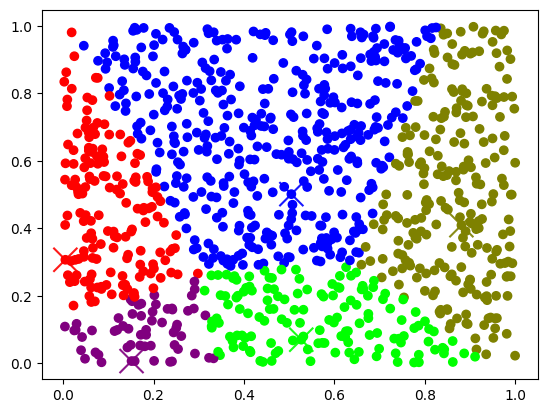

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


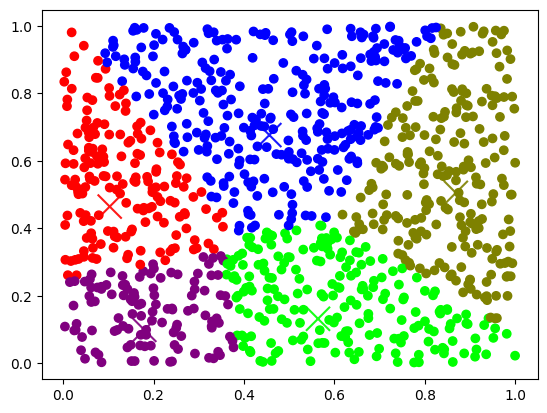

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


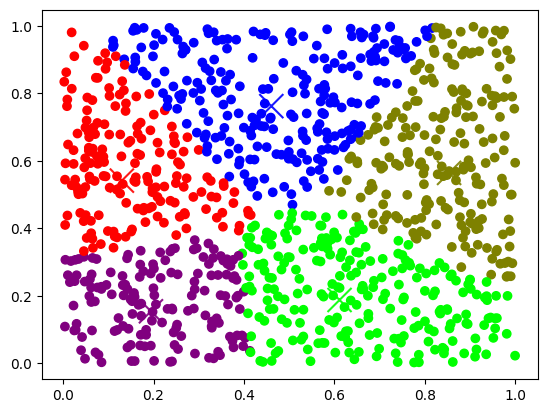

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


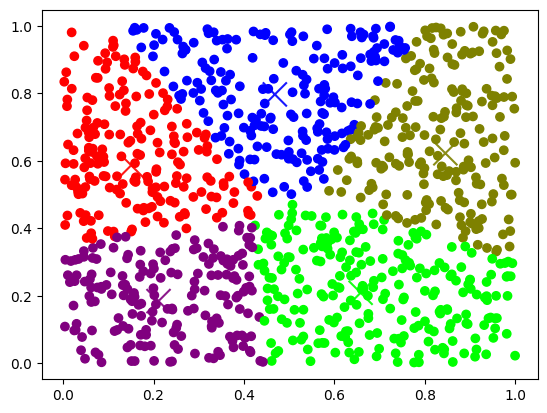

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


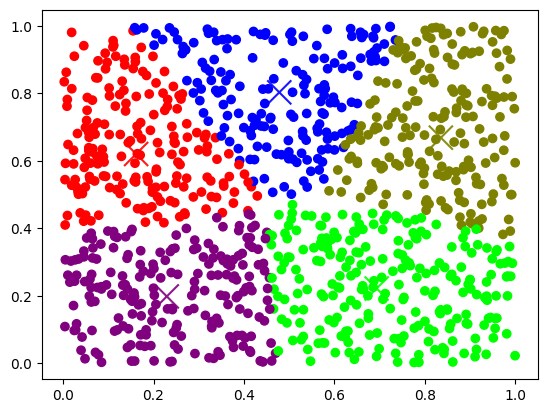

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


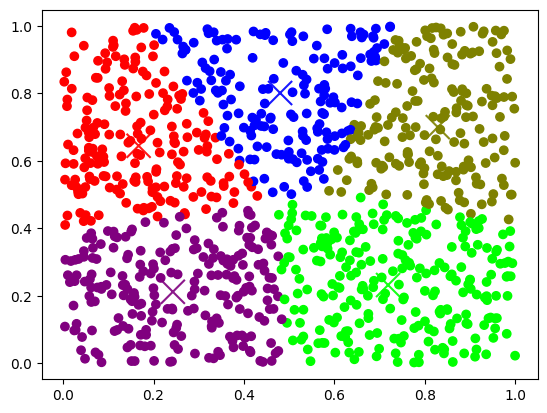

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


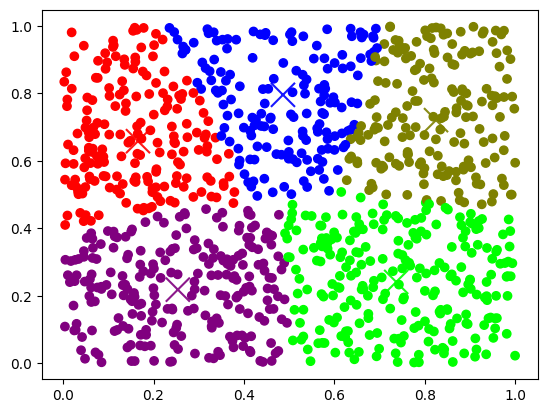

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


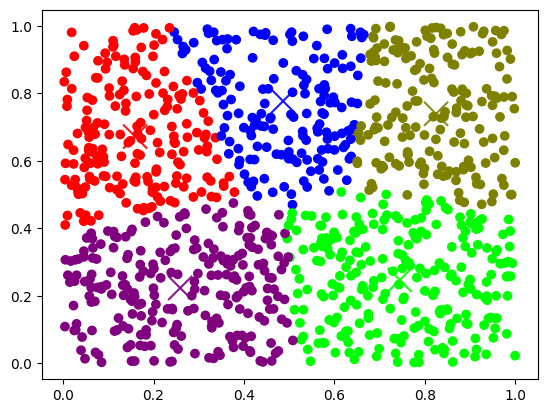

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


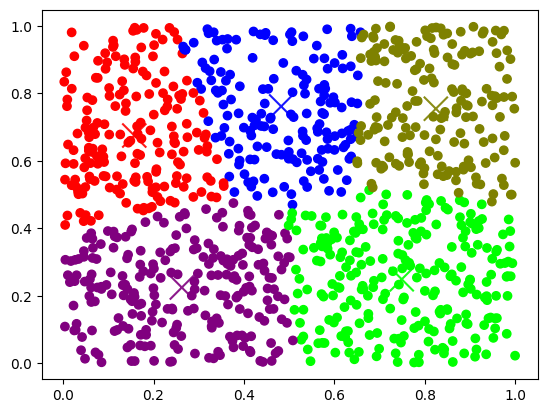

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


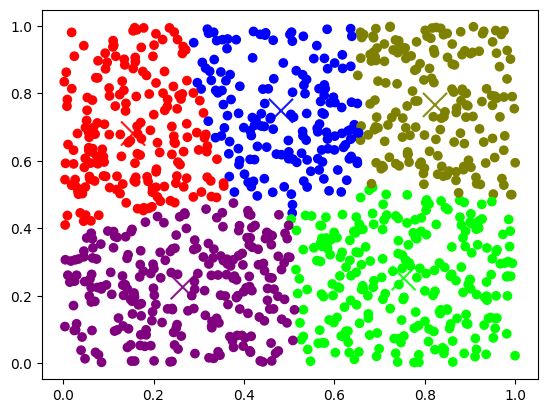

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


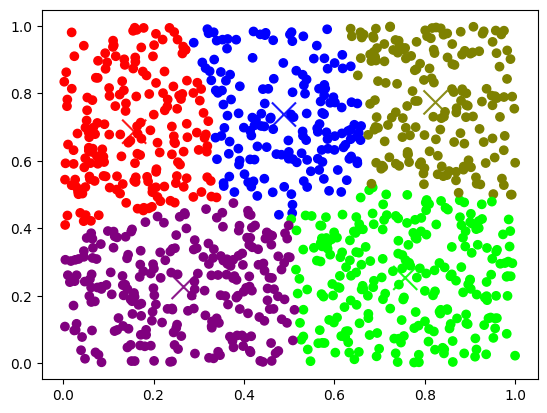

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


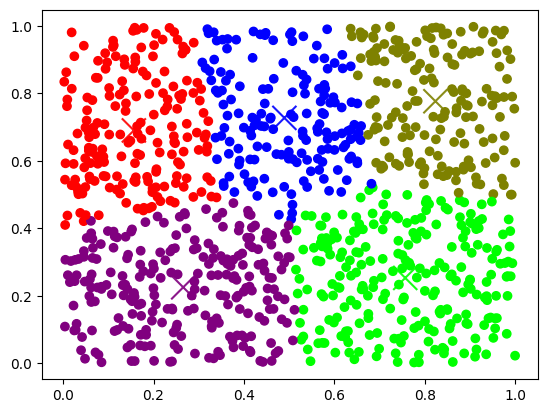

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


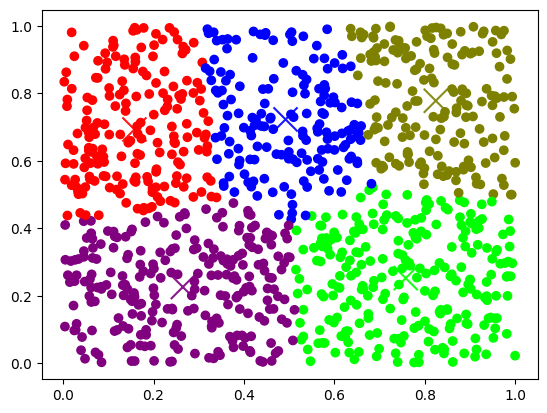

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


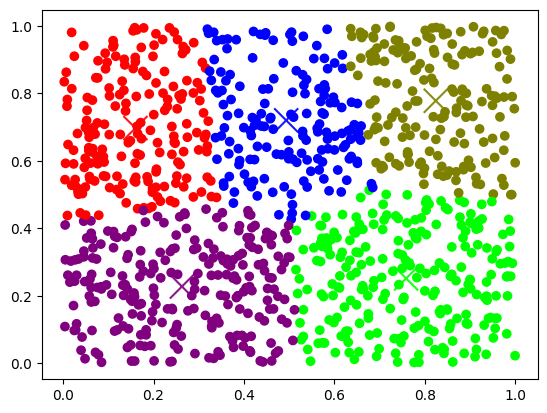

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


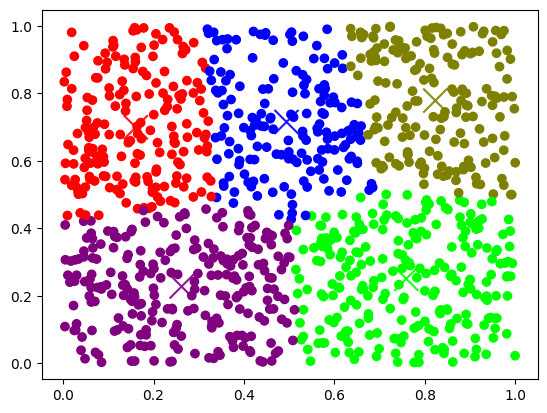

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


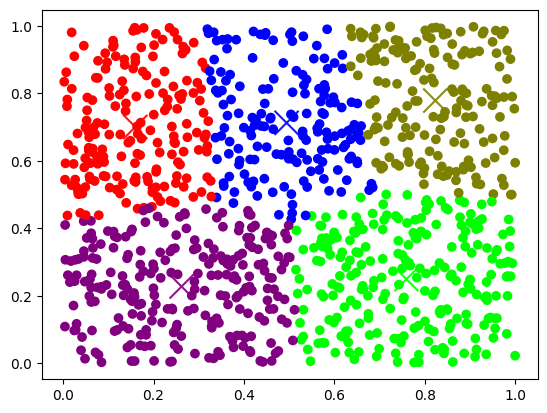

torch.Size([1000, 5]) torch.Size([1000, 2]) torch.Size([5, 2])


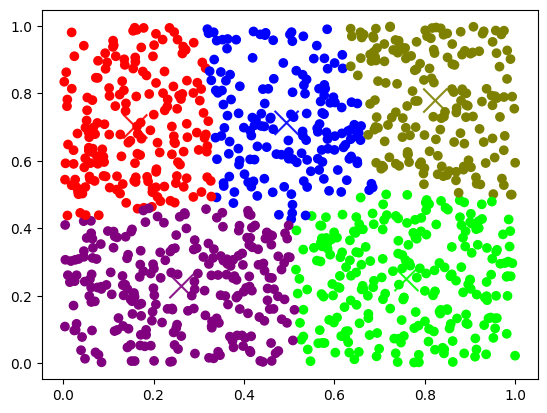

In [ ]:
flag = True
#plt.ion()
while flag:
    Labels = euclide_fn(centers=Centers)
    #plt.clf()

    visualize(labels=Labels, centers=Centers)
    plt.show()
    #plt.draw()
    #plt.gcf().canvas.flush_events()
    new_centers = step(centers=Centers, labels=Labels)

    if torch.sum(torch.eq(new_centers,Centers)) == dim*k:
        flag = False
    else:
        Centers = new_centers
    time.sleep(0.2)
#plt.ioff()

### Perceptron

In [ ]:
# Hyperparameter
c = 0.5

In [ ]:
W = torch.zeros(k,k)
W.shape

torch.Size([5, 5])

In [ ]:
if dim < k:
    tmp = torch.ones(size,k-dim)
    X = torch.cat((X,tmp), dim=1)
X.shape

torch.Size([1000, 5])

In [ ]:
def accuracy_fn(true_labels, pred_labels):
    return torch.eq(true_labels, pred_labels).sum().item() / len(true_labels) * 100

In [ ]:
X_t = torch.clone(X)
X_train = X_t[:int(size * 0.8)]
X_test = X_t[int(size*0.8):]
y_train = euclide_fn(plan_matrix=X_train[:,:2], centers=Centers[:,:2], size = int(0.8*size))
y_test = euclide_fn(plan_matrix=X_test[:,:2], centers=Centers[:,:2], size = int(size*0.2))

torch.Size([800, 5]) torch.Size([800, 2]) torch.Size([5, 2])
torch.Size([200, 5]) torch.Size([200, 2]) torch.Size([5, 2])


In [ ]:
flag = True
iter = 0
max_accuracy = 0
while flag:
    flag = False
    for i in range(len(X_train)):
        tmp = torch.mm(X_train[i].unsqueeze(dim=0), W.T).squeeze()
        if (tmp[y_train[i]] == torch.max(tmp) and torch.eq(tmp,torch.max(tmp)).sum().item() > 1) or (tmp[y_train[i]] < torch.max(tmp)):
            flag = True
            W[y_train[i]] += c * X_train[i]
            for j in range(k):
                if tmp[y_train[i]] <= tmp[j] and y_train[i] != j:
                    W[j] -= c * X_train[i]

    iter += 1

    pred = torch.argmax(torch.mm(X_train, W.T), dim=1)
    acc = accuracy_fn(true_labels=y_train, pred_labels=pred)
    if acc > max_accuracy:
        W_star = torch.clone(W)
        max_accuracy = acc
    #print(acc)
    if iter == size:
        break

In [ ]:
W = W_star
W

tensor([[ -77.2244,  -42.7497, -145.5000, -145.5000, -145.5000],
        [-111.7230, -123.2364, -128.5000, -128.5000, -128.5000],
        [-127.1519,  -45.6008, -139.5000, -139.5000, -139.5000],
        [ -17.9522,  -32.6690, -161.0000, -161.0000, -161.0000],
        [ -29.2125, -119.3748, -143.0000, -143.0000, -143.0000]])

In [ ]:
pred = torch.argmax(torch.mm(X_test, W.T), dim=1)
accuracy_fn(true_labels=y_test, pred_labels=pred)

99.5

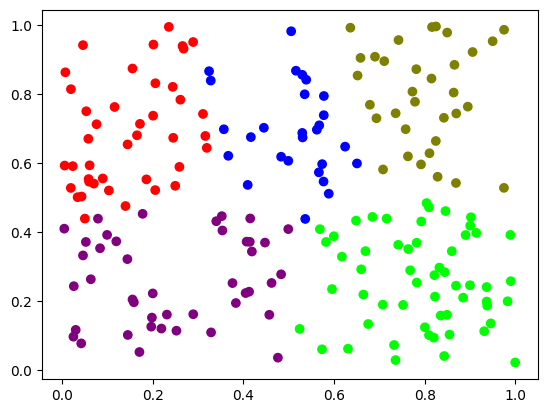

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1], c=pred, cmap='brg')

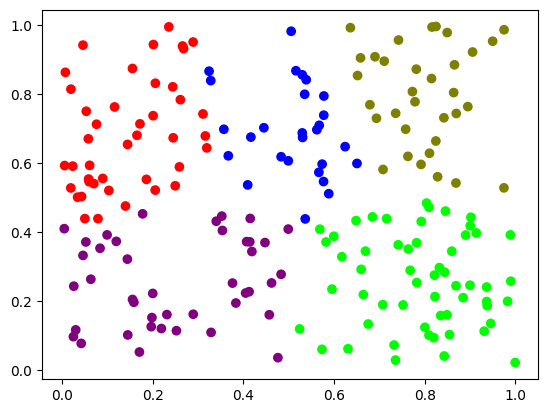

In [ ]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test, cmap='brg')